### About the dataset (Earthquake data)
The data records the earthquakes experienced for the last few years in the USA. There are four parameters in the data, where each data point represents an earthquake.

**Latitude**: Latitude of the place (above the equator)

**Longitude**: Longitude of the place (west of the prime meridian)

**DepthMeters**: Absolute height of the place

**Magnitude**: Magnitude of the earthquake wave

## Table of Content

1. **[Exploratory Data Analysis](#eda)**
2. **[K-means Clustering](#k-means)**
3. **[Interpret the Clusters](#inter)**

#### Import the required libraries

In [49]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import matplotlib.cm as cm
from sklearn.metrics import silhouette_score, silhouette_samples
from yellowbrick.cluster import silhouette_visualizer

#### Load the csv file and print the first five observations.

In [3]:
df = pd.read_csv('Earthquake_Data.csv')
df.head()

,Latitude,Longitude,DepthMeters,Magnitude
0,39.644,-75.483,5000,2.8
1,37.379,-80.746,11500,2.8
2,45.296,-73.475,18000,2.1
3,42.825,-78.239,5000,2.4
4,38.619,-80.909,100,3.4


### Let's begin with some hands-on practice exercises

<a id="eda"> </a>
## 1. Exploratory Data Analysis

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Find the number of variables and the number of observations in the data.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [5]:
df.shape

(1647, 4)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Check the datatype of each variable in the data.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1647 entries, 0 to 1646
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Latitude     1647 non-null   float64
 1   Longitude    1647 non-null   float64
 2   DepthMeters  1647 non-null   int64  
 3   Magnitude    1647 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 51.6 KB


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Find if there are missing values in the data.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [7]:
df.isnull().sum()

Latitude       0
Longitude      0
DepthMeters    0
Magnitude      0
dtype: int64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Obtain the summary statistic of data.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [8]:
df.describe()

,Latitude,Longitude,DepthMeters,Magnitude
count,1647.000000,1647.000000,1647.000000,1647.000000
mean,39.903436,-79.008111,7559.720704,2.384827
std,2.410973,3.192442,5205.963953,0.459781
min,37.007700,-82.881000,100.000000,0.200000
25%,37.902400,-81.694150,3450.000000,2.100000
50%,38.477800,-80.831400,6400.000000,2.400000
75%,41.467200,-75.934050,11500.000000,2.600000
max,45.300900,-73.063400,32300.000000,5.200000


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Visualize the outliers in the dataset using boxplot.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

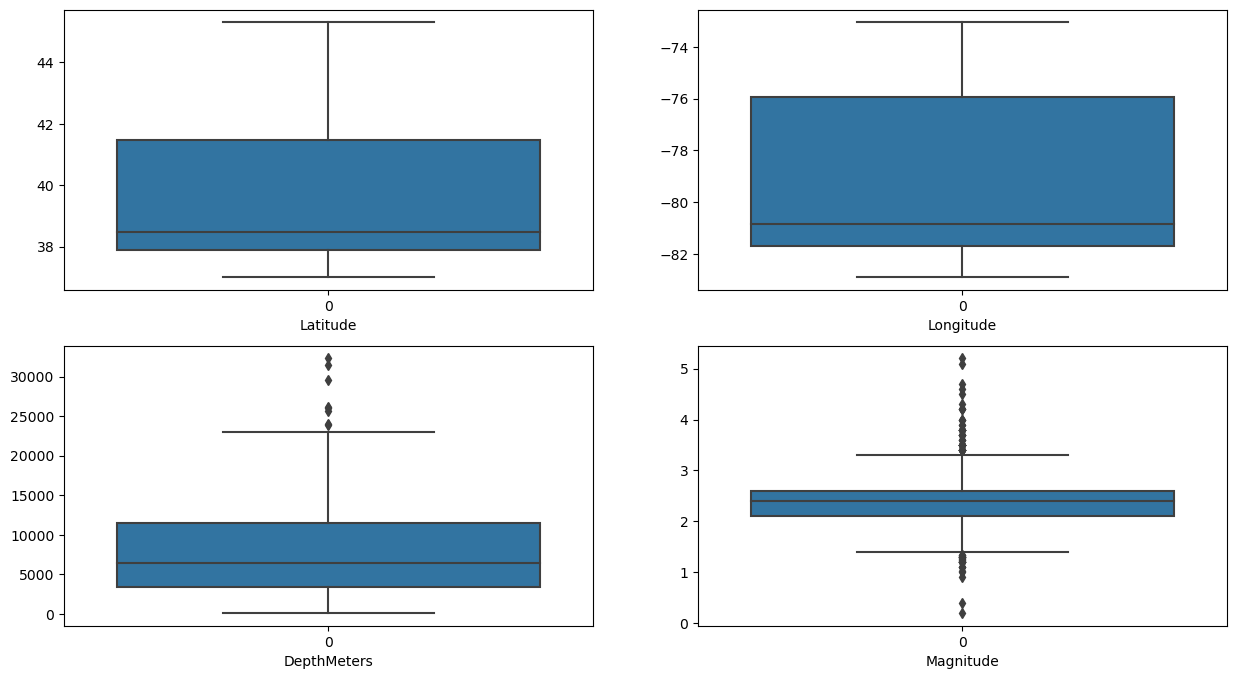

In [13]:
fig, ax = plt.subplots(2,2, figsize=(15,8))
for variable, subplot in zip(df.columns, ax.flatten()):
    boxplt = sns.boxplot(df[variable], ax=subplot)
    boxplt.set_xlabel(variable)
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Remove the outliers using the IQR method and check the shape of data.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [15]:
q1=df.quantile(0.25)
q3=df.quantile(0.75)
IQR=q3-q1
ul=q3+1.5*IQR
ll=q1-1.5*IQR
df=df[~((df<ll) | (df>ul)).any(axis=1)]
df

,Latitude,Longitude,DepthMeters,Magnitude
0,39.6440,-75.4830,5000,2.8
1,37.3790,-80.7460,11500,2.8
2,45.2960,-73.4750,18000,2.1
3,42.8250,-78.2390,5000,2.4
5,38.6750,-80.8200,2300,2.4
...,...,...,...,...
1642,37.9496,-81.3663,9500,2.3
1643,41.4521,-77.3709,11100,2.6
1644,41.0997,-78.3670,3100,2.1
1645,43.7508,-74.1109,17000,2.2


In [16]:
df=df.reset_index(drop=True)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Drop the variables representing the geographical coordinates of the earthquake.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [17]:
df=df.drop(['Latitude','Longitude'], axis=1)
df.head()

,DepthMeters,Magnitude
0,5000,2.8
1,11500,2.8
2,18000,2.1
3,5000,2.4
4,2300,2.4


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Transform the variables such that it will have mean 0 and standard deviation 1 and print the summary statistics.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [20]:
scalar=StandardScaler()
df_scaled=pd.DataFrame(scalar.fit_transform(df), columns=df.columns)
df_scaled.head()

,DepthMeters,Magnitude
0,-0.488908,1.252394
1,0.803530,1.252394
2,2.095968,-0.735020
3,-0.488908,0.116729
4,-1.025767,0.116729


<a id="k-means"> </a>
## 2. K-means Clustering

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Find within cluster sum of squares for the number of clusters from 1 to 7.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [23]:
wcss=[]
for i in range(1,8):
    kmeans=KMeans(n_clusters=i, random_state=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

In [29]:
wcss

[3124.0000000000005,
 1943.5822119519091,
 1257.9770800049273,
 964.2748832142154,
 790.5899314514638,
 675.9167406469811,
 586.2744386805521]

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Visualize the elbow plot to get the optimal value of K.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

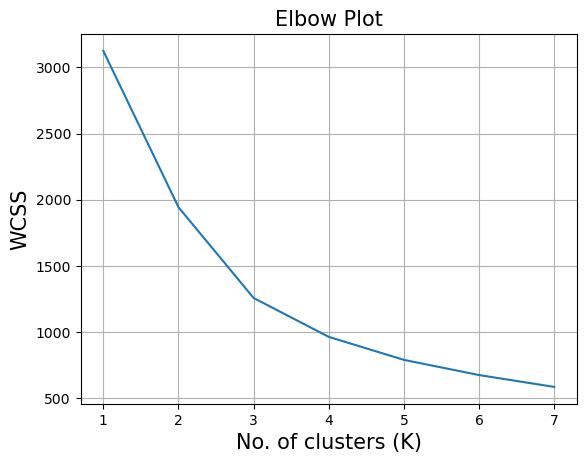

In [26]:
plt.plot(range(1,8),wcss)
plt.xticks(np.arange(1,8,1))
plt.title('Elbow Plot', fontsize=15)
plt.xlabel('No. of clusters (K)', fontsize=15)
plt.ylabel('WCSS', fontsize=15)
plt.grid()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Find the silhouette coefficient for the number of clusters from 2 to 7.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [1]:
# Faculty told to find silhouette score

In [31]:
n_clusters = [2,3,4,5,6,7]
silhouette = []
for K in n_clusters:
        cluster = KMeans(n_clusters=K, random_state=10)
        predict = cluster.fit_predict(df_scaled)
        score = silhouette_score(df_scaled, predict, random_state=10)
        silhouette.append(score)
        print('For {} clusters the silhouette score is {}'.format(K, score))

For 2 clusters the silhouette score is 0.3743704735416158
For 3 clusters the silhouette score is 0.39268003903375004
For 4 clusters the silhouette score is 0.3675083071920705
For 5 clusters the silhouette score is 0.3448574750320023
For 6 clusters the silhouette score is 0.34930956862604523
For 7 clusters the silhouette score is 0.3421864845094053


In [ ]:
n_clustre=[ef]
silhouette=[]
for k in n_clusetre:
    kmean

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Plot of silhouette coefficients using appropriate graphical method.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Text(0, 0.5, 'Silhouette Score')

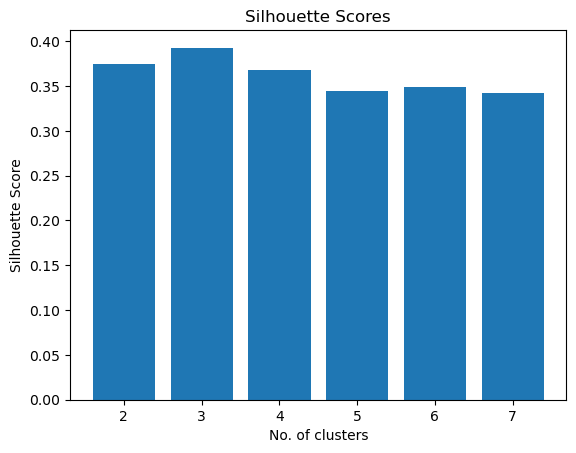

In [44]:
plt.bar(range(2,8), silhouette)
plt.title(label='Silhouette Scores')
plt.xlabel('No. of clusters')
plt.ylabel('Silhouette Score')

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Visualize the silhouette scores using silhouette plot and obtain the clusters for K from 2 to 6.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

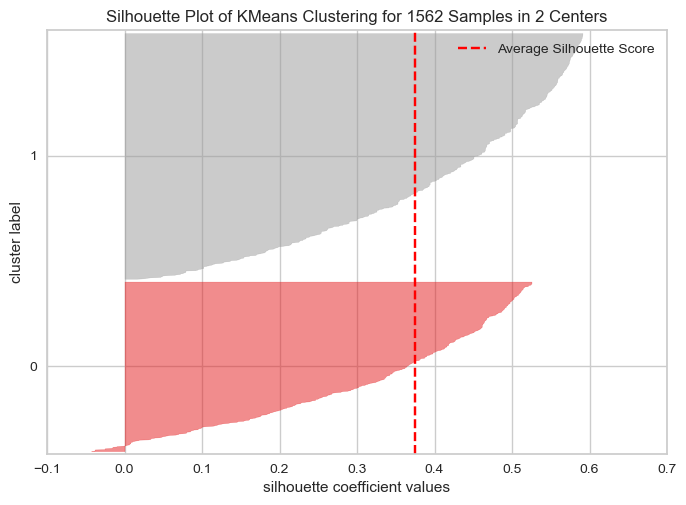

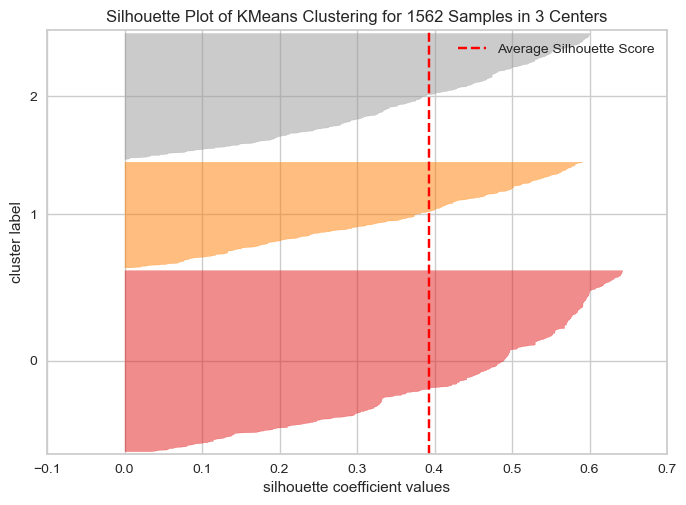

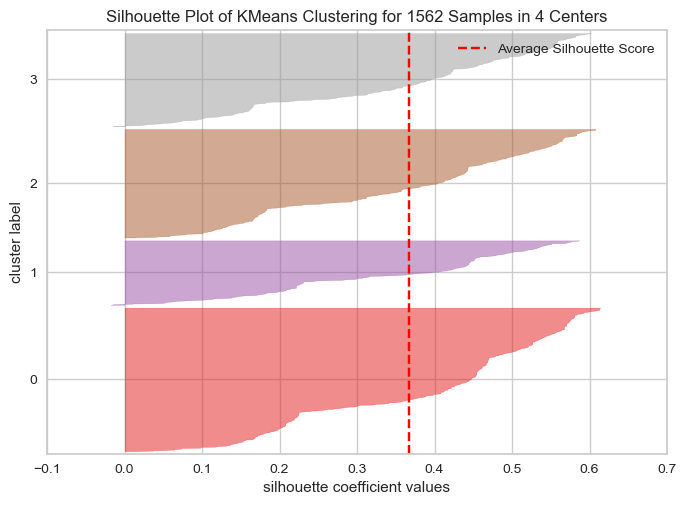

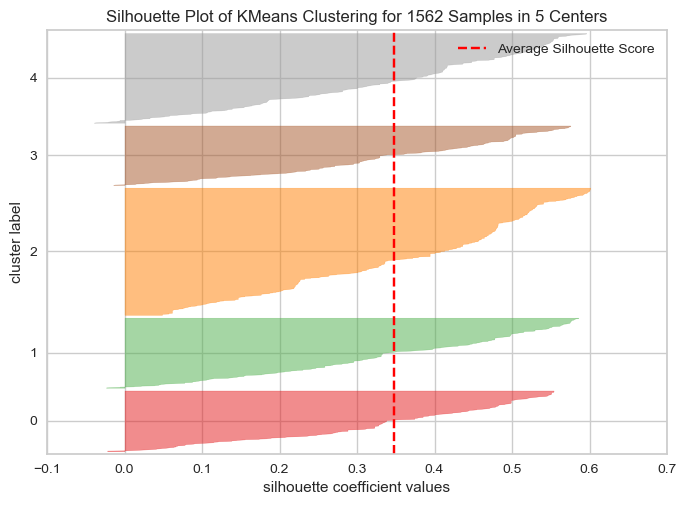

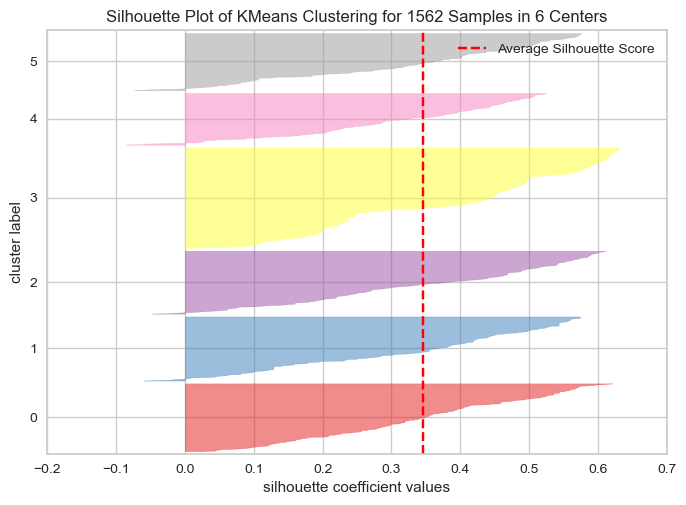

In [50]:
n_clusters = [2,3,4,5,6]

# consider an array of the data
X = np.array(df_scaled)

# for each value of K, plot the silhouette plot the clusters formed
for K in n_clusters:
    silhouette_visualizer(KMeans(K), df_scaled)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Fit K means clustering algorithm with an optimal number of clusters.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [51]:
new_clusters = KMeans(n_clusters=3, random_state=10)

# fit the model
new_clusters.fit(df_scaled)

df['Cluster'] = new_clusters.labels_
df.head()

,DepthMeters,Magnitude,Cluster
0,5000,2.8,0
1,11500,2.8,1
2,18000,2.1,1
3,5000,2.4,0
4,2300,2.4,0


<a id="inter"> </a>
## 3. Interpret the Clusters

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Consider the groups formed in the previous question and display the size of each cluster.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [55]:
df['Cluster'].value_counts()

0    685
1    477
2    400
Name: Cluster, dtype: int64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Plot the number of observations in each cluster.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<Axes: xlabel='Cluster', ylabel='count'>

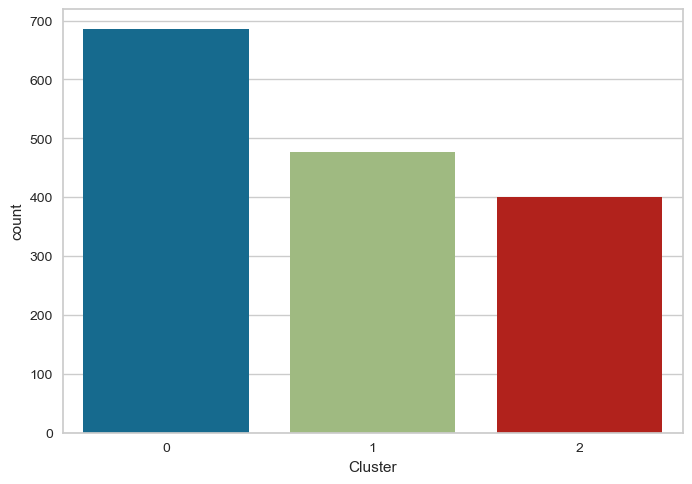

In [59]:
sns.countplot(df,x=df['Cluster'])

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. Obtain the centroids of the clusters formed using K-means clustering.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [60]:
new_clusters.cluster_centers_

array([[-0.71964524,  0.59192623],
       [ 1.17474623,  0.16696511],
       [-0.16849241, -1.21277955]])

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Obtain the observations belonging to the 1st cluster and get the summary of the cluster.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [64]:
df[df['Cluster']==0].describe()

,DepthMeters,Magnitude,Cluster
count,685.000000,685.000000,685.0
mean,3839.562044,2.567372,0.0
std,2515.001619,0.229455,0.0
min,100.000000,2.200000,0.0
25%,1500.000000,2.400000,0.0
50%,3700.000000,2.500000,0.0
75%,5600.000000,2.700000,0.0
max,10000.000000,3.300000,0.0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Obtain the observations belonging to the 2nd cluster and get the summary of the cluster.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [65]:
df[df['Cluster']==1].describe()

,DepthMeters,Magnitude,Cluster
count,477.000000,477.000000,477.0
mean,13366.939203,2.417694,1.0
std,2846.765942,0.272955,0.0
min,8300.000000,1.600000,1.0
25%,11300.000000,2.200000,1.0
50%,13100.000000,2.400000,1.0
75%,14900.000000,2.600000,1.0
max,23000.000000,3.300000,1.0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Obtain the observations belonging to the 3rd cluster and get the summary of the cluster.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [66]:
df[df['Cluster']==2].describe()

,DepthMeters,Magnitude,Cluster
count,400.000000,400.000000,400.0
mean,6611.450000,1.931725,2.0
std,3683.651261,0.211741,0.0
min,100.000000,1.390000,2.0
25%,4200.000000,1.800000,2.0
50%,6000.000000,2.000000,2.0
75%,8772.500000,2.100000,2.0
max,18600.000000,2.230000,2.0
